# The Effect of Government Stringency on the Rate of Reproduction

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from scipy.stats import t, probplot
import country_converter as coco

### Selecting the top 20 most developed countries to account for confounding

In [2]:
with open('csv/human-development-index.csv', 'r') as f:
    c = csv.reader(f)
    next(c)
    hdi = []
    for country, code, year, idx in c:
        if code == 'HKG':
            continue
        if int(year) == 2017:
            hdi.append([code, float(idx)])
    
hdi = sorted(hdi, key=lambda x:x[1], reverse=True)
hdi_top = [i[0] for i in hdi[:20]]

In [3]:
print(*hdi_top, sep='\n')

NOR
CHE
AUS
IRL
DEU
ISL
SWE
SGP
NLD
DNK
CAN
USA
GBR
FIN
NZL
BEL
LIE
JPN
AUT
LUX


### Creating dictionary of stringency and dates for selected countries

In [4]:
d = {}
# key: country
# value: [date, stringency]
# earliest 1/22/20; latest 5/8/21

with open('csv/covid-stringency-index.csv', 'r') as f:
    c = csv.reader(f) 
    next(c)
    for r in c:
        if r[1] in hdi_top and r[2] != "2020-01-21": 
            s = [datetime.strptime(r[2], '%Y-%m-%d'), float(r[3])]
            try:
                d[r[1]].append(s)
            except:
                d[r[1]] = [s]

In [5]:
usa = d['USA']
print(*usa[:10], sep='\n')
print()
print(*usa[-10:], sep='\n') 

[datetime.datetime(2020, 1, 22, 0, 0), 0.0]
[datetime.datetime(2020, 1, 23, 0, 0), 0.0]
[datetime.datetime(2020, 1, 24, 0, 0), 0.0]
[datetime.datetime(2020, 1, 25, 0, 0), 0.0]
[datetime.datetime(2020, 1, 26, 0, 0), 0.0]
[datetime.datetime(2020, 1, 27, 0, 0), 0.0]
[datetime.datetime(2020, 1, 28, 0, 0), 0.0]
[datetime.datetime(2020, 1, 29, 0, 0), 0.0]
[datetime.datetime(2020, 1, 30, 0, 0), 0.0]
[datetime.datetime(2020, 1, 31, 0, 0), 0.0]

[datetime.datetime(2021, 4, 29, 0, 0), 56.94]
[datetime.datetime(2021, 4, 30, 0, 0), 56.94]
[datetime.datetime(2021, 5, 1, 0, 0), 56.94]
[datetime.datetime(2021, 5, 2, 0, 0), 56.94]
[datetime.datetime(2021, 5, 3, 0, 0), 56.94]
[datetime.datetime(2021, 5, 4, 0, 0), 56.94]
[datetime.datetime(2021, 5, 5, 0, 0), 56.94]
[datetime.datetime(2021, 5, 6, 0, 0), 56.94]
[datetime.datetime(2021, 5, 7, 0, 0), 56.94]
[datetime.datetime(2021, 5, 8, 0, 0), 56.94]


In [6]:
print(*d.keys(), sep='\n')

AUS
AUT
BEL
CAN
DNK
FIN
DEU
ISL
IRL
JPN
LIE
LUX
NLD
NZL
NOR
SGP
SWE
CHE
GBR
USA


### Creating a dictionary of all changes in stringency for selected countries

In [7]:
changes = {}
# key: country
# value: [start date, end date, initial stringency, final stringency]
# one value for each change in stringency

countries = d.keys()
for country_name in countries:
    country = d[country_name]
    last_date = country[0][0]
    last_stringency = country[0][1]
    for date, stringency in country:
        if stringency != last_stringency:
            delta = [last_date, date, last_stringency, stringency]
            try:
                changes[country_name].append(delta)
            except:
                changes[country_name] = [delta]
            last_date = date
            last_stringency = stringency

In [8]:
print(*[i[-1] for i in changes['USA']], sep='\n')

5.56
8.33
11.11
20.37
21.76
30.09
35.65
41.2
52.31
55.09
67.13
72.69
68.98
67.13
62.5
66.2
62.5
65.28
75.46
71.76
68.06
64.35
66.2
61.57
58.8
56.94


In [9]:
length = 0
for i in d.keys():
    print(i, len(changes[i]), changes[i][0])
    length += len(changes[i])
print("TOTAL: ", length)

AUS 54 [datetime.datetime(2020, 1, 22, 0, 0), datetime.datetime(2020, 1, 25, 0, 0), 0.0, 11.11]
AUT 34 [datetime.datetime(2020, 1, 22, 0, 0), datetime.datetime(2020, 2, 24, 0, 0), 0.0, 11.11]
BEL 30 [datetime.datetime(2020, 1, 22, 0, 0), datetime.datetime(2020, 1, 28, 0, 0), 0.0, 5.56]
CAN 21 [datetime.datetime(2020, 1, 22, 0, 0), datetime.datetime(2020, 3, 11, 0, 0), 2.78, 13.89]
DNK 31 [datetime.datetime(2020, 1, 22, 0, 0), datetime.datetime(2020, 2, 27, 0, 0), 0.0, 11.11]
FIN 22 [datetime.datetime(2020, 1, 22, 0, 0), datetime.datetime(2020, 1, 27, 0, 0), 0.0, 5.56]
DEU 38 [datetime.datetime(2020, 1, 22, 0, 0), datetime.datetime(2020, 1, 24, 0, 0), 0.0, 5.56]
ISL 19 [datetime.datetime(2020, 1, 22, 0, 0), datetime.datetime(2020, 1, 23, 0, 0), 0.0, 11.11]
IRL 28 [datetime.datetime(2020, 1, 22, 0, 0), datetime.datetime(2020, 2, 4, 0, 0), 0.0, 5.56]
JPN 30 [datetime.datetime(2020, 1, 22, 0, 0), datetime.datetime(2020, 2, 1, 0, 0), 2.78, 8.33]
LIE 8 [datetime.datetime(2020, 1, 22, 0, 0), 

### Finding deaths, confirmed cases, recovered for selected countries

In [10]:
def toIso3(country):
    return coco.convert(names=[country], to='iso3')

In [11]:
# key: country
# value: [date, metric]
def proc(file):
    with open(file, 'r') as f:
        c = csv.reader(f)
        next(c)
        d = {}
        for i in c:
            if i[1] == 'Diamond Princess' or i[1] == 'MS Zaandam':
                continue
            iso = toIso3(i[1])
            if iso in hdi_top:
                try:
                    for j in range(len(d[iso])):
                        d[iso][j][1] += int(i[j+4])
                except:
                    d[iso] = []
                    for j in range(len(i[4:])):
#                         if datetime(2020, 1, 22) + timedelta(days=j) > datetime(2021, 5, 8):
#                             break
                        d[iso].append([datetime(2020, 1, 22) + timedelta(days=j), int(i[j+4])])
    return d

In [12]:
confirmed = proc('csv/time_series_covid19_confirmed_global.csv')
deaths = proc('csv/time_series_covid19_deaths_global.csv')
recovered = proc('csv/time_series_covid19_recovered_global.csv')

In [13]:
print(len(confirmed), len(deaths), len(recovered))

20 20 20


In [14]:
print(*recovered['USA'][-5:], sep='\n')

[datetime.datetime(2021, 5, 10, 0, 0), 0]
[datetime.datetime(2021, 5, 11, 0, 0), 0]
[datetime.datetime(2021, 5, 12, 0, 0), 0]
[datetime.datetime(2021, 5, 13, 0, 0), 0]
[datetime.datetime(2021, 5, 14, 0, 0), 0]


### Creating a dictionary of times to check for response after stringency change

In [15]:
print(*changes['USA'][-5:], sep='\n')
print(len(changes['AUS']))

[datetime.datetime(2021, 2, 3, 0, 0), datetime.datetime(2021, 3, 4, 0, 0), 68.06, 64.35]
[datetime.datetime(2021, 3, 4, 0, 0), datetime.datetime(2021, 3, 22, 0, 0), 64.35, 66.2]
[datetime.datetime(2021, 3, 22, 0, 0), datetime.datetime(2021, 3, 23, 0, 0), 66.2, 61.57]
[datetime.datetime(2021, 3, 23, 0, 0), datetime.datetime(2021, 3, 29, 0, 0), 61.57, 58.8]
[datetime.datetime(2021, 3, 29, 0, 0), datetime.datetime(2021, 3, 30, 0, 0), 58.8, 56.94]
54


In [16]:
def response(iso, react):
    pairs = []
    for indte, fidte, instr, fistr in changes[iso]:
        d_str = fistr - instr
        d_day = (indte - datetime(2020, 1, 22)).days + react
        if d_day >= len(deaths[iso]):
            break
        d_deaths = deaths[iso][d_day][1] - deaths[iso][d_day-react][1] 
        d_confirmed = confirmed[iso][d_day][1] - confirmed[iso][d_day-react][1] 
        d_recovered = recovered[iso][d_day][1] - recovered[iso][d_day-react][1] 
        pairs.append([d_str, (d_deaths + d_confirmed - d_recovered)])
    return pairs

In [17]:
final_data = {}
for i in hdi_top:
    final_data[i] = response(i, 21)

In [18]:
length = 0
for i in final_data.keys():
    print(i, len(final_data[i]), final_data[i][-1])
    length += len(final_data[i])
print("TOTAL: ", length)

NOR 32 [-2.780000000000001, 9150]
CHE 23 [-9.259999999999998, 54118]
AUS 51 [36.10999999999999, 95]
IRL 28 [-3.700000000000003, 11115]
DEU 38 [-2.780000000000001, 50724]
ISL 19 [2.780000000000001, 74]
SWE 15 [-3.700000000000003, 118494]
SGP 14 [1.8500000000000014, -12]
NLD 22 [-3.700000000000003, 121996]
DNK 31 [-2.779999999999994, 2372]
CAN 21 [3.6999999999999886, 23269]
USA 26 [-1.8599999999999994, 1421520]
GBR 47 [-1.3900000000000006, 48584]
FIN 22 [3.700000000000003, 241]
NZL 26 [-14.350000000000001, 8]
BEL 30 [-5.559999999999995, 67051]
LIE 8 [8.339999999999996, 0]
JPN 30 [3.700000000000003, 34100]
AUT 33 [-1.8500000000000085, -8903]
LUX 26 [-7.410000000000004, 477]
TOTAL:  542


In [19]:
xlist = []
ylist = []
for i in hdi_top:
    for x, y in final_data[i]:
#         xlist.append(x)
        xlist.append(np.sign(x)*np.log(abs(x)+10**(-100)))
#         ylist.append(y)
        ylist.append(np.sign(y)*np.log(abs(y)+10**(-100)))

In [20]:
# plt.scatter(xlist, ylist)
# # plt.ylim(-2*10**4, 2*10**5)
# plt.show()

In [21]:
len(xlist)

542

In [22]:
x_np_list = np.array(xlist)
y_np_list = np.array(ylist)

std_x = np.std(x_np_list)
std_y = np.std(y_np_list)
bar_x = np.mean(x_np_list)
bar_y = np.mean(y_np_list)

a = (np.sum((x_np_list - bar_x) * (y_np_list - bar_y))) / np.sum((x_np_list - bar_x)**2)
b = bar_y - (a * bar_x)
r = a * std_x / std_y

In [23]:
print(a, b)
print(std_x, bar_x)
print(std_y, bar_y)
print(r)
print(r**2)

0.9064349690452193 5.070506597119449
1.7667751184637743 0.4101944148534562
6.538458663755428 5.442321158849663
0.24493031648146213
0.059990859931709196


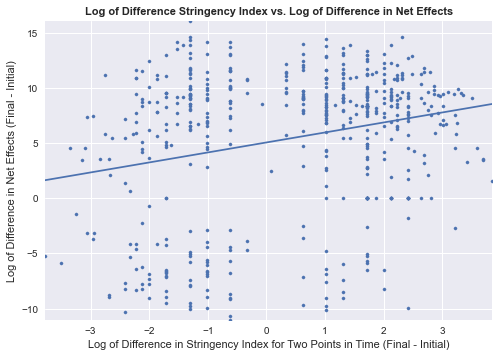

In [24]:
plt.style.use("seaborn")
plt.title('Log of Difference Stringency Index vs. Log of Difference in Net Effects', fontsize=11, fontweight='bold')
plt.xlabel('Log of Difference in Stringency Index for Two Points in Time (Final - Initial)', fontsize=11)
plt.ylabel('Log of Difference in Net Effects (Final - Initial)', fontsize=11)
plt.scatter(x_np_list, y_np_list, s=10)
plt.plot(np.linspace(-10, 10, 100), [a*i + b for i in np.linspace(-10, 10, 100)])
plt.ylim(min(y_np_list), max(y_np_list))
plt.xlim(min(x_np_list), max(x_np_list))
plt.savefig('png/e.png')
plt.show()

In [25]:
yhat = a*x_np_list+b
sse = (np.sum((y_np_list - yhat)**2)/(len(x_np_list)-2))**0.5

In [32]:
print(sse)

6.351030290171824


In [33]:
t_stat = 0.975 * a/sse

In [35]:
print(t_stat)

0.1391544449389138


In [34]:
t.sf(t_stat, len(xlist)-2)

0.44468999326807457

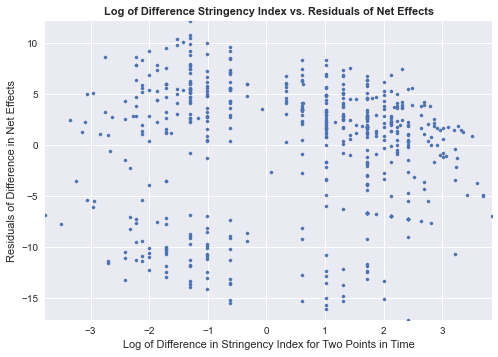

In [28]:
plt.style.use("seaborn")
plt.title('Log of Difference Stringency Index vs. Residuals of Net Effects', fontsize=11, fontweight='bold')
plt.xlabel('Log of Difference in Stringency Index for Two Points in Time', fontsize=11)
plt.ylabel('Residuals of Difference in Net Effects', fontsize=11)
plt.scatter(x_np_list, y_np_list-yhat, s=10)
# plt.plot(np.linspace(-10, 10, 100), [a*i + b for i in np.linspace(-10, 10, 100)])
plt.ylim(min(y_np_list-yhat), max(y_np_list-yhat))
plt.xlim(min(x_np_list), max(x_np_list))
plt.savefig('png/f.png')
plt.show()

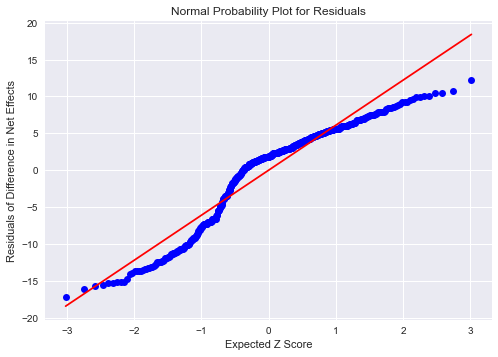

In [29]:
probplot(ylist-yhat, plot=plt)
plt.style.use("seaborn")
plt.title('Normal Probability Plot for Residuals')
plt.ylabel('Residuals of Difference in Net Effects')
plt.xlabel('Expected Z Score')
plt.savefig('png/g.png')
plt.show()

In [30]:
(a*xlist[4]+b)

6.625584715276396

In [31]:
yhat[4]

6.625584715276396